In [17]:
import scipy.io
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

# Loading the data

In [18]:
data_path = "./data/"

ARDS_data = scipy.io.loadmat(data_path + "Ards.mat")
Control_data = scipy.io.loadmat(data_path + "Control.mat")

ARDS_data = {key: ARDS_data[key][0] for key in ["P", "Q", "V", "t"]}
Control_data = {key: Control_data[key][0] for key in ["P", "Q", "V", "t"]}

# Part 1 : make plots of the differents curves

In [19]:
def plot_time_curve(X, Y, t, alpha_value = 0.5, x_label = "X", y_label ="Y", grid = True, title = "Time curve", x_lim=None, y_lim=None):
    # Create a colormap that represents the gradient of time
    cmap = plt.cm.jet  # You can choose any colormap you prefer
    norm = plt.Normalize(min(t), max(t))
    ncolors = len(t)  # Number of colors should match the number of time points
    colors = cmap(norm(t))

    # Create a list of segments for the LineCollection
    points = np.array([X, Y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Create a LineCollection object with a color gradient
    lc = LineCollection(segments, cmap=ListedColormap(colors), norm=BoundaryNorm(t, ncolors), linewidth=2, alpha=alpha_value)
    lc.set_array(t)

    # Plot the trajectory
    fig, ax = plt.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)
    plt.colorbar(lc, label='Time')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if grid:
        plt.grid()
    if x_lim is not None:
        plt.xlim(x_lim)
    if y_lim is not None:
        plt.ylim(y_lim)
    plt.show()


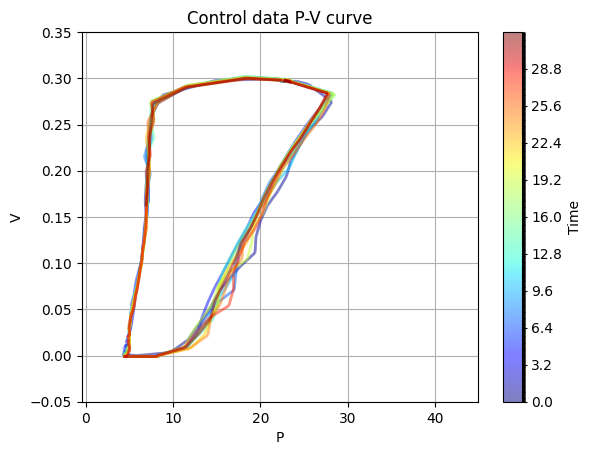

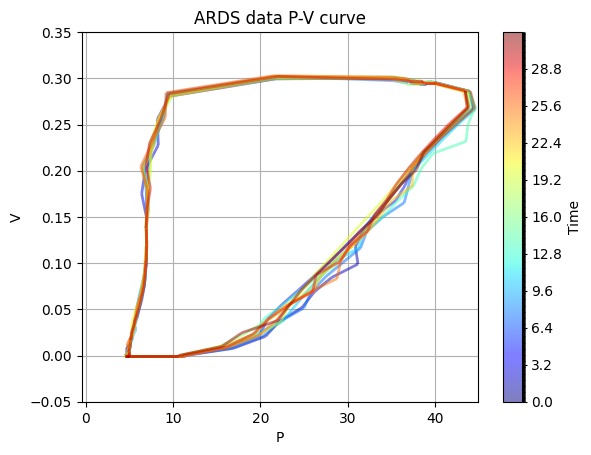

In [20]:
plot_time_curve(Control_data['P'], Control_data['V'], Control_data['t'] - Control_data['t'][0], title="Control data P-V curve", x_label="P", y_label="V", grid=True, x_lim=[-0.5, 45], y_lim=[-0.05, 0.35])
plot_time_curve(ARDS_data['P'], ARDS_data['V'], ARDS_data['t'] - ARDS_data['t'][0], title="ARDS data P-V curve", x_label="P", y_label="V", grid=True, x_lim=[-0.5, 45], y_lim=[-0.05, 0.35])

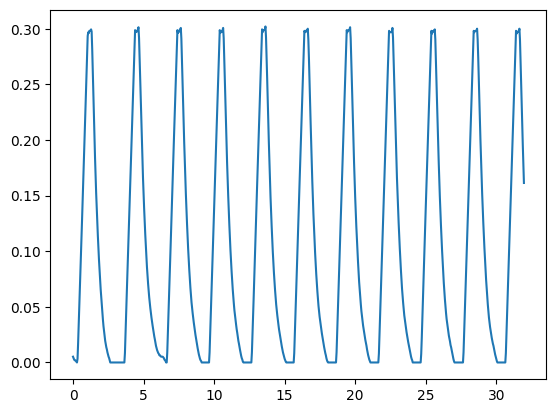

In [22]:
plt.figure()
plt.plot(Control_data['t'] - Control_data['t'][0], Control_data['P'], label="Control data")